# The purpose of this notebook is to explore and clean data about the comic book The Avengers

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Pandas allows you to get a csv file from an url, however the url must be linked to the raw data page
avengers = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/9b532414ecc7d7efdf9f0f4435f4f19de7e6f73a/avengers/avengers.csv')
avengers.shape

#Downloaded data from FiveThirtyEight's github repo:
#https://raw.githubusercontent.com/fivethirtyeight/data/9b532414ecc7d7efdf9f0f4435f4f19de7e6f73a/avengers/avengers.csv

(173, 21)

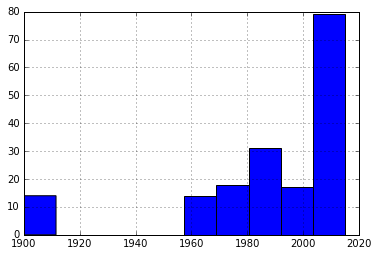

In [23]:
#Plot a histogram for the Year in which each avenger was introduced
avengers['Year'].hist()

In [29]:
#We want to store only the rows describing Avengers added in 1960 or later in true_avengers. For this we will use the pandas df
#method apply() coupled with a lambda function that eliminates rows based on year
filt = avengers.apply(lambda x: x['Year'] >= 1960, axis=1)
true_avengers = avengers[filt == True]
print(true_avengers.shape)

(159, 21)


We can see that by filtering out only the avengers who joined after 1960, we are left with a dataset that has 159 examples
instead of 173 (filtered out 14 rows.)

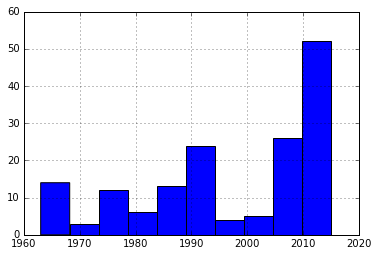

In [30]:
#Here is now a histogram by year of our filtered data
true_avengers['Year'].hist()

We will create a new column, Deaths, in true_avengers that contains the number of times each superhero died. 
The possible values for each death field are YES, NO, and NaN for missing data.

In [57]:
#Create a function that takes a row as input, returns total number of deaths of avenger {0:5}
def count_deaths(row):
    count = 0
    if row["Death1"] == 'NO':
        return count
    death_cols = ['Death1','Death2','Death3','Death4','Death5']
    for col in death_cols:
        if row[col] == "YES":
            count += 1
    return count

#Now using applying count_death func to each row of our df
true_avengers['Deaths'] = true_avengers.apply(lambda x: count_deaths(x), axis=1)
true_avengers.head(5)

URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2  http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3  http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4   http://marvel.wikia.com/Thor_Odinson_(Earth-616)   

                    Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                      Sep-63  1963                   52   
3                 NaN                      Sep-63  1963                   52   
4                 NaN                      Sep-63  1963                   52   

  Honorary  ...   Death2 Return2 Death3 Return3 Death4 Return4 Death5 Return5  \
0     Full  ...      NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   
1     Full  ...      NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   
2     Full  ...      NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   
3     Full  ...      NaN     NaN    NaN     NaN    NaN     NaN    NaN     NaN   
4     Full  ...      YES      NO    NaN     NaN    NaN     NaN    NaN     NaN   

                                               Notes Deaths  
0  Merged with Ultron in Rage of Ultron Vol. 1. A...      1  
1  Dies in Secret Invasion V1:I8. Actually was se...      1  
2  Death: "Later while under the influence of Imm...      1  
3  Dies in Ghosts of the Future arc. However "he ...      1  
4  Dies in Fear Itself brought back because that'...      2  

[5 rows x 22 columns]

We want to know if the Years since joining field accurately reflects the Year column
We will calculate the number of rows where Years since joining is accurate.

In [64]:
#First, I will create a new column called yrs_since_joining_check, where I will subtract the year they joined from 2015
true_avengers['yrs_since_joining_check'] = 2015-true_avengers['Year']

#Now we will cross-referencing this check column with the original 'years since joining' column with a lambda function
years_check = true_avengers.apply(lambda x: x['yrs_since_joining_check'] == x['Years since joining'], axis=1)

#Now we will count the number of rows where those two columns match
joined_accuracy_count = len(years_check[years_check == True])
print(joined_accuracy_count)

159


We can see from the analysis above that joined_accuracy_count matches the same number of rows in our df, meaning all of our
'Years since joining' values are actually correct.

What other questions can be answered using this data? What else needs to be cleaned/re-evaluated?
    Create a new column for number of times returned?

In [67]:
import numpy as np

#On average, do full-time avengers spend more time than honorary members
#Create a pivot table that uses honorary/full-time status as index, then examine mean number of years since joining
pd.pivot_table(true_avengers, values='Years since joining', index='Honorary', aggfunc=np.mean)

Honorary
Academy      5.000000
Full        18.253623
Honorary    27.500000
Name: Years since joining, dtype: float64